<a href="https://colab.research.google.com/github/nestorbalcazar/nestorbalcazar.github.io/blob/master/RadHT_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Radiative heat transfer**
Updated: 6 November 2024 \\
Author: Prof. Nestor Balcazar Arciniega \\
**SOLVED EXAMPLES**

In [ ]:
from sympy import symbols, integrate, pi, sin, cos, latex
from sympy.abc import theta, phi
from IPython.display import display, Math

# ==============================================================================
# EXAMPLE 01
# Calculate the solid angle of a semi-sphere
# ==============================================================================
# Define the integration limits for a hemisphere in spherical coordinates
solid_angle = integrate(integrate(sin(theta), (theta, 0, pi/2)), (phi, 0, 2*pi))
# Display the result in LaTeX format
display(Math(r"\omega = \int_{\psi=0}^{2\, \pi} \int_{\theta=0}^{\pi/2} \mathrm{sin}(\psi) \, d\psi \, d\theta =" + latex(solid_angle)))


<IPython.core.display.Math object>

In [ ]:
# ==============================================================================
# EXAMPLE 02
# Calculate int(cos(theta)d omega) in a semi-sphere
# ==============================================================================
# Define the integration limits for a hemisphere in spherical coordinates
solid_angle = integrate(integrate(cos(theta) * sin(theta), (theta, 0, pi/2)), (phi, 0, 2*pi))
# Display the result in LaTeX format
display(Math(r"\omega = \int_{\psi=0}^{2\, \pi} \int_{\theta=0}^{\pi/2} \mathrm{cos}(\theta) \, \mathrm{sin}(\psi) \, d\psi \, d\theta =" + latex(solid_angle)))


<IPython.core.display.Math object>

**EXAMPLE 03**

We have a selective surface at a temperature: $ T_w = 830^\circ \text{C} $. The emission is diffuse with a spectral emissivity,
$ \epsilon_\lambda $, given by:

$ \epsilon_\lambda = 0.8 \quad \text{for } \lambda \leq 4 \, \mu \text{m} $,

$ \epsilon_\lambda = 0.3 \quad \text{for } \lambda > 4 \, \mu \text{m} $.

\\
1. **Calculate the total hemispherical radiative flux** emitted from $ \lambda = 0 $ up to $ \lambda_c = 4 \, \mu \text{m} $ and from $ \lambda = 4 \, \mu \text{m} $ to infinity. Plot $ \dot{q}_\lambda - \lambda $ diagram, and identify the wavelength $ \lambda $ corresponding to the maximum emission.

2. **Calculate the total radiative flux emitted** in a direction inclined at $ 30^\circ $ with respect to the normal to the surface.

3. **Calculate the absorbed radiative flux** from radiation arriving from an external black body at: $ T_\text{ext} = 227^\circ \text{C} $.





In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Constants
h = 6.62607015e-34       # Planck's constant (J·s)
c = 2.99792458e8         # Speed of light (m/s)
k = 1.380649e-23         # Boltzmann constant (J/K)
sigma = 5.67e-8          # Stefan-Boltzmann constant (W/m²·K⁴)
Tw = 830 + 273.15        # Surface temperature in Kelvin
lambda_c = 4e-6          # Cut-off wavelength in meters

# Set a practical upper limit for lambda (e.g., 50 micrometers)
lambda_max = 50e-6

# Emissivity function
def emiss_i(lamb):
    return 0.8 * (lamb <= lambda_c) + 0.3 * (lamb > lambda_c)

# Define spectral radiance function (Planck's Law)
def Ib_lw(lamb, T):
    return (2 * h * c**2 / lamb**5) / (np.exp(h * c / (lamb * T * k)) - 1)

# Define radiative flux q
def q_lw(lamb, T, theta):
    return emiss_i(lamb) * Ib_lw(lamb, T) * np.cos(theta)

# Define hemispherical radiative flux q_l
def q_l(lamb, T):
    return np.pi * emiss_i(lamb) * Ib_lw(lamb, T)

# Define total hemispherical radiative flux q with finite upper limit
def q(T):
    result, _ = quad(lambda lamb: q_l(lamb, T), 0, lambda_max, epsrel=1e-10)
    return result

# Display results with finite upper limit
q_Tw = q(Tw)
eps = q_Tw / (sigma * Tw**4)

# Radiative flux at theta = 30 degrees with finite upper limit
q_w_theta, _ = quad(lambda lamb: q_lw(lamb, Tw, 30 * np.pi / 180), 0, lambda_max, epsrel=1e-10)

<ipython-input-29-a327a71ca555>:22: RuntimeWarning: overflow encountered in exp
  return (2 * h * c**2 / lamb**5) / (np.exp(h * c / (lamb * T * k)) - 1)


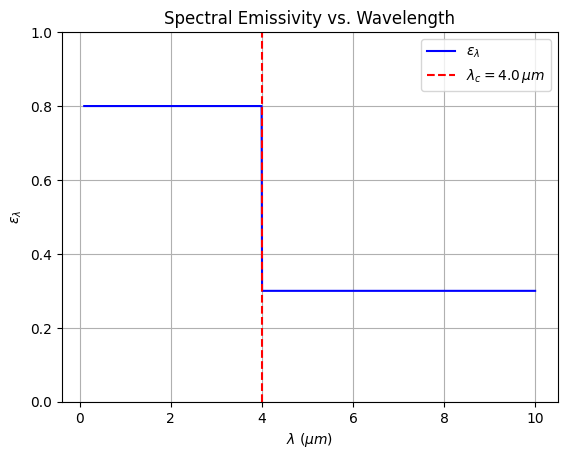

In [30]:
# Plotting the emissivity function
lambda_i = np.linspace(1e-7, 1e-5, 1000)
plt.figure()
plt.plot(lambda_i * 1e6, [emiss_i(lamb) for lamb in lambda_i], 'b', label=r'$\epsilon_{\lambda}$')
plt.axvline(lambda_c * 1e6, color='r', linestyle='--', label=f"$\lambda_c = {lambda_c * 1e6:.1f} \, \mu m$")
plt.xlabel(r'$\lambda$ ($\mu m$)')
plt.ylabel(r'$\epsilon_{\lambda}$')
plt.title('Spectral Emissivity vs. Wavelength')
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

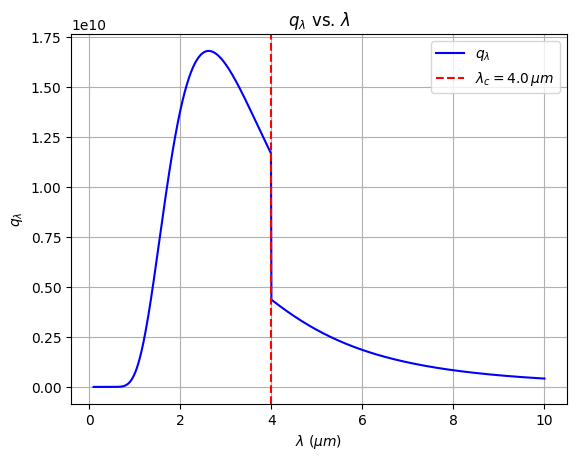

1. q(Tw) = 4.830e+04 W/m²
   eps = 5.752e-01
2. q_w(Tw, theta=30°) = 1.331e+04 W/m²


In [31]:
# Plotting q_l vs. λ
lambda_i = np.linspace(1e-7, 1e-5, 1000)
plt.figure()
plt.plot(lambda_i * 1e6, [q_l(lamb, Tw) for lamb in lambda_i], 'b', label=r'$q_{\lambda}$')
plt.axvline(lambda_c * 1e6, color='r', linestyle='--', label=f"$\lambda_c = {lambda_c * 1e6:.1f} \, \mu m$")
plt.xlabel(r'$\lambda$ ($\mu m$)')
plt.ylabel(r'$q_{\lambda}$')
plt.title(r'$q_{\lambda}$ vs. $\lambda$')
plt.legend()
plt.grid(True)
plt.show()

print(f"1. q(Tw) = {q_Tw:.3e} W/m²")
print(f"   eps = {eps:.3e}")
print(f"2. q_w(Tw, theta=30°) = {q_w_theta:.3e} W/m²")